In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 7]
plt.style.use('dark_background')

In [4]:
df = pd.read_csv(filepath_or_buffer='Data\\msft.csv', header=1, index_col=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
# Date,,,,,,
02-01-1990,0.605903,0.616319,0.598090,0.616319,0.450929,53033600
03-01-1990,0.621528,0.626736,0.614583,0.619792,0.453470,113772800
04-01-1990,0.619792,0.638889,0.616319,0.638021,0.466807,125740800
05-01-1990,0.635417,0.638889,0.621528,0.622396,0.455375,69564800
08-01-1990,0.621528,0.631944,0.614583,0.631944,0.462361,58982400


In [5]:
#df.index = pd.to_datetime(df.index, format='%d-%m-%Y')
df['top_slope'] = pd.Series(float('NaN'), index=df.index)
df['bot_slope'] = pd.Series(float('NaN'), index=df.index)
df['bar_no'] = range(0, len(df))
df = df.set_index(keys='bar_no')
df.head()

,Open,High,Low,Close,Adj Close,Volume,top_slope,bot_slope
bar_no,,,,,,,,
0,0.605903,0.616319,0.598090,0.616319,0.450929,53033600,NaN,NaN
1,0.621528,0.626736,0.614583,0.619792,0.453470,113772800,NaN,NaN
2,0.619792,0.638889,0.616319,0.638021,0.466807,125740800,NaN,NaN
3,0.635417,0.638889,0.621528,0.622396,0.455375,69564800,NaN,NaN
4,0.621528,0.631944,0.614583,0.631944,0.462361,58982400,NaN,NaN


In [6]:
df = df.drop(['Open', 'Close', 'Adj Close', 'Volume'], axis='columns')
df.head()

,High,Low,top_slope,bot_slope
bar_no,,,,
0,0.616319,0.598090,NaN,NaN
1,0.626736,0.614583,NaN,NaN
2,0.638889,0.616319,NaN,NaN
3,0.638889,0.621528,NaN,NaN
4,0.631944,0.614583,NaN,NaN


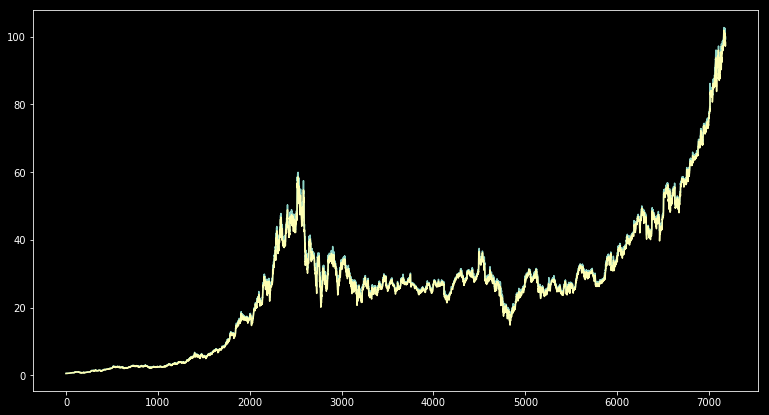

In [7]:
plt.plot(df.index.values, df['High'], df.index.values, df['Low'])

In [8]:
max_high_pos = df['High'].idxmax()
min_low_pos = df['Low'].idxmin()

In [9]:
top_rot_pos = max_high_pos
bot_rot_pos = min_low_pos

In [10]:
if (max_high_pos > min_low_pos):
    positive_slope = True
else:
    positive_slope = False
    

In [11]:
if(positive_slope):
    startpos_high = 0
    endpos_high = top_rot_pos - 1
    startpos_low = bot_rot_pos + 1
    endpos_low = df.shape[0] - 1
else:
    startpos_high = top_rot_pos + 1
    endpos_high = df.shape[0] - 1
    startpos_low = 0
    endpos_low = bot_rot_pos - 1

In [12]:
#slope = (y-yi)/(x-xi)

df['top_slope'] = pd.Series(float('NaN'), index=df.index)

length = endpos_high - startpos_high
y = df.loc[top_rot_pos, 'High']
y = pd.Series(y, index=range(startpos_high, length))
yi = df.loc[startpos_high:endpos_high, 'High']
x = top_rot_pos
x = pd.Series(x, index=range(startpos_high, length))
xi = df.index.tolist()[startpos_high:endpos_high]

df.loc[startpos_high:endpos_high, 'top_slope'] = ((y.sub(yi)).div(x.sub(xi))).mul(100)


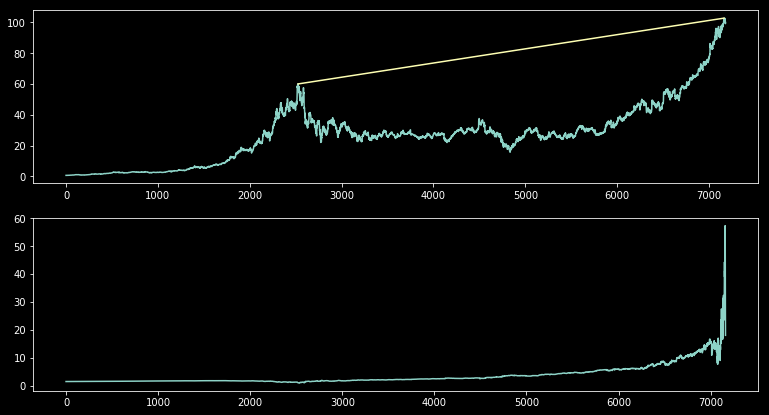

In [16]:
plt.figure(1)
plt.subplot(211)
plt.plot(df.index.values, df['High'])

x1 = df['top_slope'].idxmin()
x2 = top_rot_pos
y1 = df.loc[df['top_slope'].idxmin(), 'High']
y2 = df.loc[top_rot_pos, 'High']
plt.plot([x1, x2], [y1, y2])

plt.subplot(212)
plt.plot(df.index.values, df['top_slope'])